<a href="https://colab.research.google.com/github/mohamedHashem250/Python_Challenges/blob/main/CustomNeuralNetwork_usingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Source ::https://medium.com/@kaanerdenn/neural-network-classification-by-tensorflow-3c4816d930ad
from sklearn.datasets import make_circles

#making 1000 samples
n_samples = 1000
#creating cicles

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [2]:
#checking features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#checking labels:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd
circles = pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


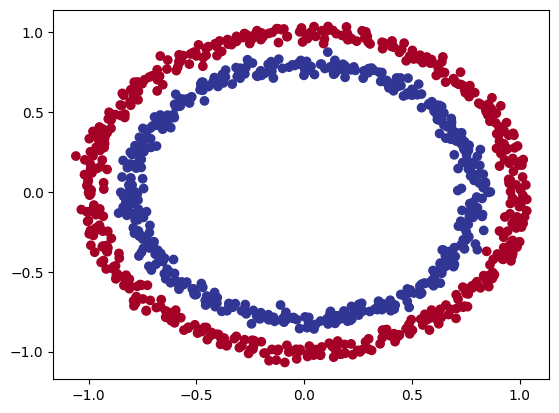

In [5]:
#visualizing with plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [6]:
#split data into train and test sets:
X_train , y_train = X[:800], y[:800]
X_test , y_test = X[800:], y[800:]

X_train.shape , X_test.shape

((800, 2), (200, 2))

In [7]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Infer output shape from predictions
  output_shape = y_pred.shape

  # Check for multi-class
  if output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [9]:
#traditonal method
tf.random.set_seed(42)
#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#compile
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
#
#fit
history = model.fit(X_train, y_train, epochs = 100, verbose = 2)


Epoch 1/100
25/25 - 3s - 108ms/step - accuracy: 0.5013 - loss: 0.7169
Epoch 2/100
25/25 - 0s - 7ms/step - accuracy: 0.4675 - loss: 0.7097
Epoch 3/100
25/25 - 0s - 2ms/step - accuracy: 0.4950 - loss: 0.7057
Epoch 4/100
25/25 - 0s - 2ms/step - accuracy: 0.4950 - loss: 0.7032
Epoch 5/100
25/25 - 0s - 2ms/step - accuracy: 0.4975 - loss: 0.7015
Epoch 6/100
25/25 - 0s - 2ms/step - accuracy: 0.4975 - loss: 0.7002
Epoch 7/100
25/25 - 0s - 2ms/step - accuracy: 0.5038 - loss: 0.6990
Epoch 8/100
25/25 - 0s - 2ms/step - accuracy: 0.5025 - loss: 0.6979
Epoch 9/100
25/25 - 0s - 2ms/step - accuracy: 0.5038 - loss: 0.6970
Epoch 10/100
25/25 - 0s - 2ms/step - accuracy: 0.5025 - loss: 0.6961
Epoch 11/100
25/25 - 0s - 3ms/step - accuracy: 0.5025 - loss: 0.6953
Epoch 12/100
25/25 - 0s - 5ms/step - accuracy: 0.5038 - loss: 0.6945
Epoch 13/100
25/25 - 0s - 5ms/step - accuracy: 0.5100 - loss: 0.6938
Epoch 14/100
25/25 - 0s - 2ms/step - accuracy: 0.5088 - loss: 0.6931
Epoch 15/100
25/25 - 0s - 2ms/step - accu

In [10]:
#Evaluate
#Evaluate
loss , accuracy = model.evaluate(X_test , y_test)
print(f" model loss on test set :{loss}")
print(f"moedl accuacry on test set :{accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9691 - loss: 0.3317  
 model loss on test set :0.3282509744167328
moedl accuacry on test set :0.9700000286102295


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


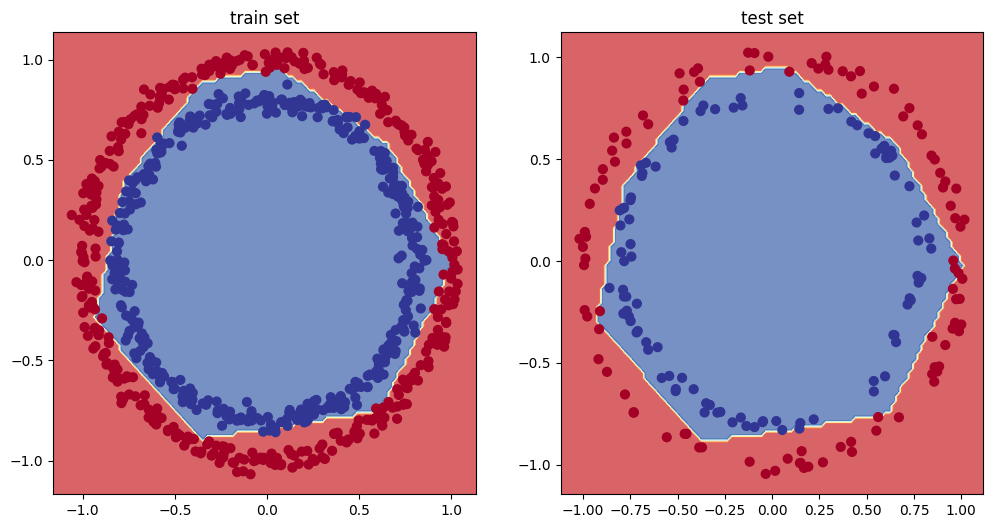

In [11]:
#plot the decision boundaries for the training and test sets:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train set")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test set")
plot_decision_boundary(model,X_test,y_test)
plt.show()

Text(0.5, 0, 'epochs')

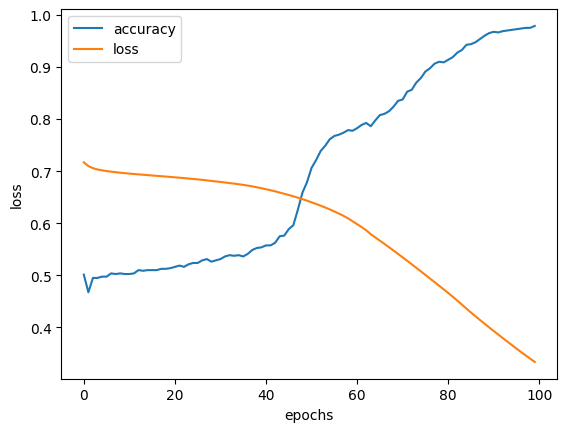

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [12]:
#build the code with custom neural network , to deeper understand how the opertions implempented in neural network
class nn(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.layer1 = tf.keras.layers.Dense(4, activation = 'relu')
    self.layer2 = tf.keras.layers.Dense(4, activation = 'relu')
    self.layer3 = tf.keras.layers.Dense(1, activation = 'sigmoid')
  #forward pass
  def call(self, inputs):
    x = self.layer1(inputs)
    x = self.layer2(x)
    return self.layer3(x)
  #compile method for optimizer and loss
  def compile(self, optimizer, loss, mertics):
    self.compile = super().compile()
    self.optimizer = optimizer
    self.loss = loss
    self.mertics = mertics
  #custom train_step method
  @tf.function
  def train_step(self, data):
    features , labels  = data
    with tf.GradientTape() as tape:
      #record the operations
      predictions = self(features)
      loss = self.loss(labels, predictions)
      #compute the gredients
    gradients = tape.gradient(loss, self.trainable_variables)
    #update weights
    self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
    #compute the mertics
    self.mertics.update_state(labels, predictions)
    return {"loss":loss, "mertics":self.mertics.result()}
  @tf.function
  def test_step(self, data):
    features , labels  = data
    predictions = self(features)
    loss = self.loss(labels, predictions)
    self.mertics.update_state(labels, predictions)
    return {"loss":loss, "mertics":self.mertics.result()}



In [15]:
#let's define the actual model
custom_nn = nn()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()
mertics = tf.keras.metrics.BinaryAccuracy()
custom_nn.compile(optimizer, loss, mertics)
#setting the dataset:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [16]:
#let's train
history = custom_nn.fit(train_dataset, epochs = 100, verbose = 2)

Epoch 1/100
25/25 - 2s - 70ms/step - loss: 0.6978 - mertics: 0.5063
Epoch 2/100
25/25 - 0s - 1ms/step - loss: 0.6930 - mertics: 0.5425
Epoch 3/100
25/25 - 0s - 1ms/step - loss: 0.6929 - mertics: 0.5537
Epoch 4/100
25/25 - 0s - 2ms/step - loss: 0.6885 - mertics: 0.5487
Epoch 5/100
25/25 - 0s - 2ms/step - loss: 0.6820 - mertics: 0.5587
Epoch 6/100
25/25 - 0s - 2ms/step - loss: 0.6687 - mertics: 0.5800
Epoch 7/100
25/25 - 0s - 1ms/step - loss: 0.6494 - mertics: 0.6212
Epoch 8/100
25/25 - 0s - 2ms/step - loss: 0.6228 - mertics: 0.6862
Epoch 9/100
25/25 - 0s - 2ms/step - loss: 0.5686 - mertics: 0.7212
Epoch 10/100
25/25 - 0s - 2ms/step - loss: 0.5162 - mertics: 0.7525
Epoch 11/100
25/25 - 0s - 2ms/step - loss: 0.4609 - mertics: 0.7975
Epoch 12/100
25/25 - 0s - 3ms/step - loss: 0.4050 - mertics: 0.8662
Epoch 13/100
25/25 - 0s - 2ms/step - loss: 0.3375 - mertics: 0.9538
Epoch 14/100
25/25 - 0s - 2ms/step - loss: 0.2775 - mertics: 0.9837
Epoch 15/100
25/25 - 0s - 1ms/step - loss: 0.2214 - mert

In [19]:
#Evaluate
#Evaluate
loss , accuracy = custom_nn.evaluate(X_test , y_test)
print(f" model loss on test set :{loss}")
print(f"moedl accuacry on test set :{accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - mertics: 0.9950  
 model loss on test set :0.0013753625098615885
moedl accuacry on test set :0.9950000047683716


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


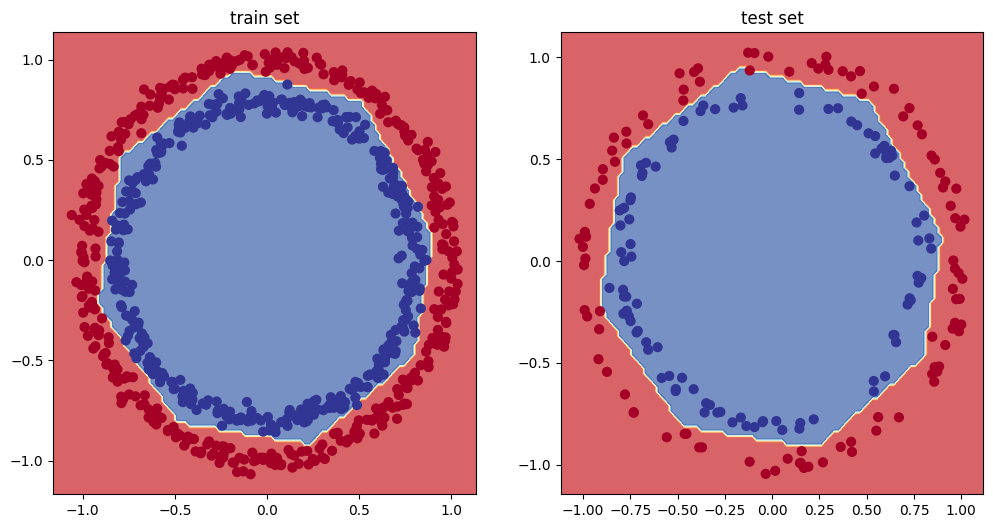

In [27]:
#plot the decision boundaries for the training and test sets:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train set")
plot_decision_boundary(custom_nn,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test set")
plot_decision_boundary(custom_nn,X_test,y_test)
plt.show()

Text(0.5, 0, 'epochs')

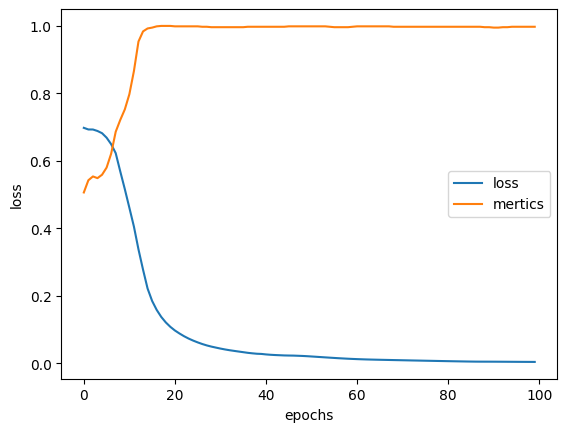

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")